### Import necessary modules

In [19]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
# Suppress all warnings for sake of readability
import warnings
warnings.filterwarnings('ignore')

### Data Acquisition and Processing

In [21]:
# read from file from ESPN
data = pd.read_csv('nfl_team_stats_2002-2022.csv')

# create "Win" column, the parameter to classify upon
# win = 1 if the home team won
data['Win'] = np.where(data['score_home'] > data['score_away'], 1, 0)
# reformat date column to compare dates
data.date = pd.to_datetime(data.date).dt.date

# desired variables
X = ['total_yards_home', 'passing_yards_home', 'rushing_yards_home',
        'total_yards_away', 'passing_yards_away', 'rushing_yards_away', 'fumbles_away', 'fumbles_home', 'int_away', 'int_home', 'turnovers_away', 'turnovers_home']
Y = ['Win']

# split data to train on 2002 - 2021 seasons, test on 2022 (2022-2023) season
date_2022 = datetime.date(2022, 6, 1)
X_train = data[data['date'] < date_2022][X]
y_train = data[data['date'] < date_2022][Y]
X_test = data[data['date'] >= date_2022][X]
y_test = data[data['date'] >= date_2022][Y]

# normalize all variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [22]:
# necessary import for this model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
# train the model
log_model.fit(X_train, y_train)
# predict on the test set
log_y_pred = log_model.predict(X_test)

# analyze results
print("Logistic Regression")
print(confusion_matrix(y_test, log_y_pred))
print(classification_report(y_test, log_y_pred))
print("Accuracy:", accuracy_score(y_test, log_y_pred))

Logistic Regression
[[ 96  28]
 [ 29 131]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       124
           1       0.82      0.82      0.82       160

    accuracy                           0.80       284
   macro avg       0.80      0.80      0.80       284
weighted avg       0.80      0.80      0.80       284

Accuracy: 0.7992957746478874


### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

print("Decision Tree")
print(confusion_matrix(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))
print("Accuracy:", accuracy_score(y_test, dt_y_pred))

Decision Tree
[[ 79  45]
 [ 34 126]]
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       124
           1       0.74      0.79      0.76       160

    accuracy                           0.72       284
   macro avg       0.72      0.71      0.71       284
weighted avg       0.72      0.72      0.72       284

Accuracy: 0.721830985915493


### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

print("Random Forest")
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))
print("Accuracy:", accuracy_score(y_test, rf_y_pred))

Random Forest
[[ 93  31]
 [ 26 134]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       124
           1       0.81      0.84      0.82       160

    accuracy                           0.80       284
   macro avg       0.80      0.79      0.80       284
weighted avg       0.80      0.80      0.80       284

Accuracy: 0.7992957746478874


### SVM

In [25]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

print("Support Vector Machine")
print(confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))
print("Accuracy:", accuracy_score(y_test, svm_y_pred))

Support Vector Machine
[[ 93  31]
 [ 27 133]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       124
           1       0.81      0.83      0.82       160

    accuracy                           0.80       284
   macro avg       0.79      0.79      0.79       284
weighted avg       0.80      0.80      0.80       284

Accuracy: 0.795774647887324


### KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors")
print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))
print("Accuracy:", accuracy_score(y_test, knn_y_pred))

K-Nearest Neighbors
[[ 90  34]
 [ 34 126]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       124
           1       0.79      0.79      0.79       160

    accuracy                           0.76       284
   macro avg       0.76      0.76      0.76       284
weighted avg       0.76      0.76      0.76       284

Accuracy: 0.7605633802816901


### Neural Net (Multi-layer Perceptron)

In [27]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)

print("Simple Neural Network")
print(confusion_matrix(y_test, nn_y_pred))
print(classification_report(y_test, nn_y_pred))
print("Accuracy:", accuracy_score(y_test, nn_y_pred))

Simple Neural Network
[[100  24]
 [ 31 129]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       124
           1       0.84      0.81      0.82       160

    accuracy                           0.81       284
   macro avg       0.80      0.81      0.80       284
weighted avg       0.81      0.81      0.81       284

Accuracy: 0.8063380281690141


### Visualizing the models

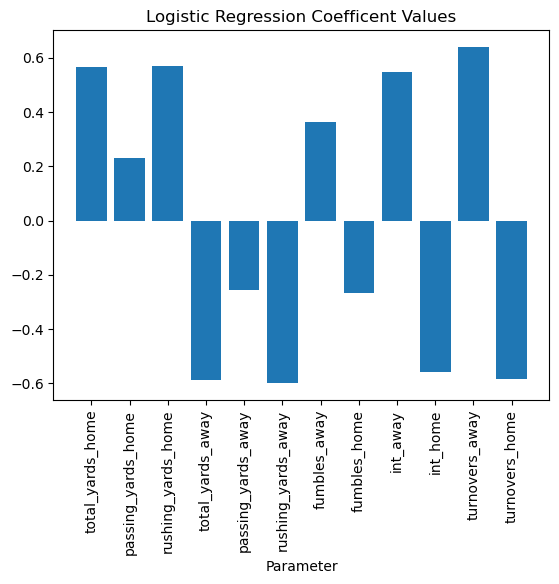

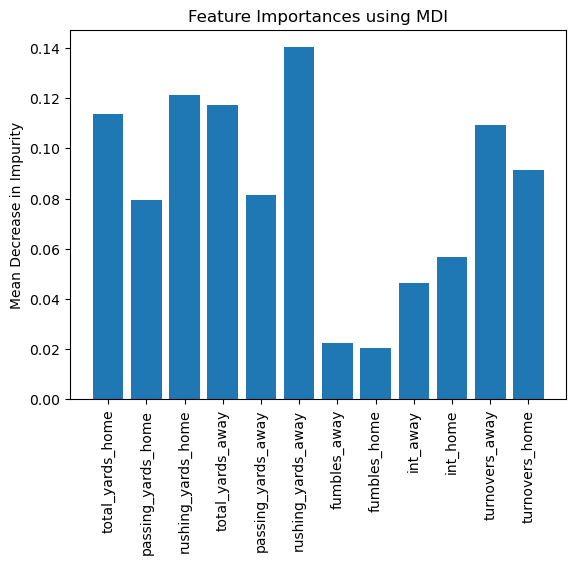

In [28]:
import matplotlib.pyplot as plt

# logistic regression coefficients
fig, ax = plt.subplots()

# hbars = ax.bar(np.arange(len(X)), model.coef_, align='center')
hbars = ax.bar(X, log_model.coef_[0])
plt.xticks(rotation=90)
ax.set_xlabel('Parameter')
ax.set_title('Logistic Regression Coefficent Values')

plt.show()

# random forest feature importances
fig, ax = plt.subplots()

hbars = ax.bar(X, rf_model.feature_importances_)
plt.xticks(rotation=90)
ax.set_ylabel("Mean Decrease in Impurity")
ax.set_title('Feature Importances using MDI')

plt.show()